# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
SERVS_cat=Table.read('../data/ELAIS_N1/MIPS/dmu26_XID+MIPS_ELAIS-N1_SERVS_cat_20170710.fits')
SWIRE_cat=Table.read('../data/ELAIS_N1/MIPS/dmu26_XID+MIPS_ELAIS-N1_SWIRE_cat_20170725.fits')

In [3]:
SERVS_cat[0:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
str100,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J161006.621+533656.872,242.527587012,53.6157979058,10.4667,22.6099,3.04599,-0.0133419,4.90328e-06,nan,2000.0,0.0
HELP_J161005.559+533642.824,242.523161793,53.6118954771,12.3774,25.8053,3.60663,-0.0133419,4.90328e-06,nan,2000.0,0.0
HELP_J161008.641+533615.951,242.536005913,53.6044309555,116.806,131.279,103.169,-0.0133419,4.90328e-06,nan,2000.0,0.0
HELP_J161002.817+533625.213,242.511735883,53.6070036615,70.9787,88.4681,52.4919,-0.0133419,4.90328e-06,nan,2000.0,0.0
HELP_J161009.708+533610.215,242.540451147,53.6028373869,132.994,146.192,120.556,-0.0133419,4.90328e-06,nan,2000.0,0.0
HELP_J161000.783+533454.820,242.503263565,53.5818943665,5.79204,13.5911,1.59307,-0.0133419,4.90328e-06,nan,2000.0,0.0
HELP_J161002.558+533606.162,242.510656314,53.6017117556,18.1655,31.734,6.73982,-0.0133419,4.90328e-06,nan,2000.0,0.0
HELP_J161005.420+533611.962,242.522583128,53.6033228215,12.266,24.3795,3.96191,-0.0133419,4.90328e-06,nan,2000.0,0.0


In [4]:
SWIRE_cat[0:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,
str100,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bool
HELP_J160000.316+542000.690,240.001318675,54.3335249815,1928.47,1943.4,1913.42,-0.000955198,4.74435e-06,nan,1196.0,1.0,True
HELP_J161145.788+525236.929,242.94078253,52.8769246635,244.531,531.299,80.7009,0.011866,5.16518e-06,1.00054,1760.0,0.0,False
HELP_J161138.168+525244.570,242.909032282,52.8790472905,239.355,531.635,65.6535,0.011866,5.16518e-06,1.00149,2000.0,0.0,False
HELP_J161143.750+525251.314,242.93229323,52.8809206325,242.255,516.11,71.3392,0.011866,5.16518e-06,1.00016,2000.0,0.0,False
HELP_J161131.547+525241.333,242.881447116,52.8781479465,262.442,560.661,81.3861,-0.00204203,4.91504e-06,1.00381,2000.0,0.0,False
HELP_J161128.756+525312.827,242.869815896,52.8868964635,256.02,554.574,68.8019,-0.00204203,4.91504e-06,1.00221,1068.0,0.0,False
HELP_J161132.773+525325.277,242.886553205,52.8903547935,68.2279,171.721,16.9382,0.377187,4.94219e-06,nan,2000.0,0.0,False
HELP_J161138.691+525423.576,242.911211156,52.9065487865,67.2236,176.488,18.5074,0.377187,4.94219e-06,nan,2000.0,0.0,False


## Look at Symmetry of PDFs to determine depth level of catalogue

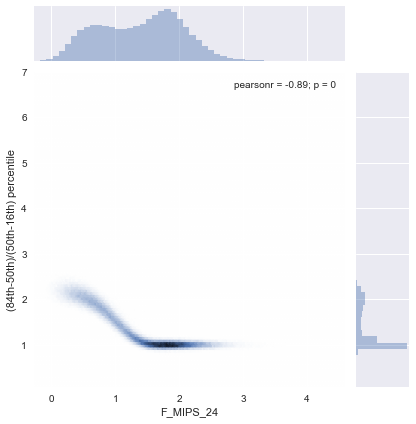

In [5]:
skew=(SERVS_cat['FErr_MIPS_24_u']-SERVS_cat['F_MIPS_24'])/(SERVS_cat['F_MIPS_24']-SERVS_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SERVS_cat['F_MIPS_24']),y=skew, kind='hex')

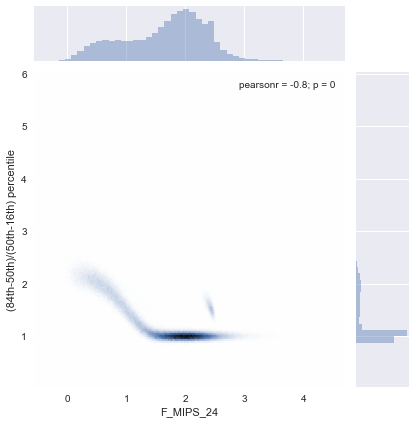

In [6]:
skew=(SWIRE_cat['FErr_MIPS_24_u']-SWIRE_cat['F_MIPS_24'])/(SWIRE_cat['F_MIPS_24']-SWIRE_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_MIPS_24']),y=skew, kind='hex')

Both seem to have flux pdfs that become Gaussian at ~20$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [7]:
from astropy.table import Column
SERVS_cat.add_column(Column(np.zeros(len(SERVS_cat), dtype=bool),name='flag_mips_24'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_mips_24'))


In [8]:
ind_SERVS=(SERVS_cat['Pval_res_24']>0.5) | (SERVS_cat['F_MIPS_24'] < 20.0)
ind_SWIRE=(SWIRE_cat['Pval_res_24']>0.5) | (SWIRE_cat['F_MIPS_24'] < 20.0)

In [9]:
SERVS_cat['flag_mips_24'][ind_SERVS]=True
SWIRE_cat['flag_mips_24'][ind_SWIRE]=True


In [11]:
SERVS_cat.write('../data/ELAIS_N1/MIPS/dmu26_XID+MIPS_ELAIS-N1_SERVS_cat_20170725.fits', format='fits',overwrite=True)
SWIRE_cat.write('../data/ELAIS_N1/MIPS/dmu26_XID+MIPS_ELAIS-N1_SWIRE_cat_20170725.fits', format='fits',overwrite=True)